# DM 01 : Introduction à python et modèle linéaire

##  Exercice 1 : Experience de Galton

### Partie A : Régression linéaire univariée

Import des librairies et des palettes de couleurs spécifiques

In [2]:
#pour afficher les graphes dans le notebook
%matplotlib inline

#import des librairies
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import linear_model as lm
import seaborn as sns
from statsmodels.nonparametric.kde import KDEUnivariate
from mpl_toolkits.mplot3d import Axes3D

#palette de couleurs
sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]
my_pink = color_blind_list[3]

Récupération du fichier .csv à partir de l'URL spécifiée dans l'énoncé:

In [80]:
url = 'http://www.math.uah.edu/stat/data/'
filename = 'Galton.csv'
location = url + filename

QUESTION 1 : Lire le fichier .csv et créer une dataframe associée.

In [81]:
fields = ['Family', 'Father', 'Mother', 'Gender', 'Height', 'Kids']
df = pd.read_csv(location,',', usecols=fields)
df_len = len(df)

QUESTION 2 : Tester s'il y a des données manquantes.

In [82]:
count = 0
for value in df.items():
    if not value:
        count += 1
print('Il y a ' + str(count) + ' donnée(s) manquante(s)')

Il y a 0 donnée(s) manquante(s)


En l'occurrence, pour ce fichier, il n'y a acune donnée manquante.
Convertissons les données sur la taille en cm (les données de départ sont en inch):

In [83]:
df['Father'] = round(df['Father']* 2.54, 0)
df['Mother'] = round(df['Mother']* 2.54, 0)
df['Height'] = round(df['Height']* 2.54, 0)

QUESTION 3 : Afficher un estimateur de la densité pour les pères et les mères. 

On va, pour ce faire, utiliser une méthode à noyau:

C:\Users\Audrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


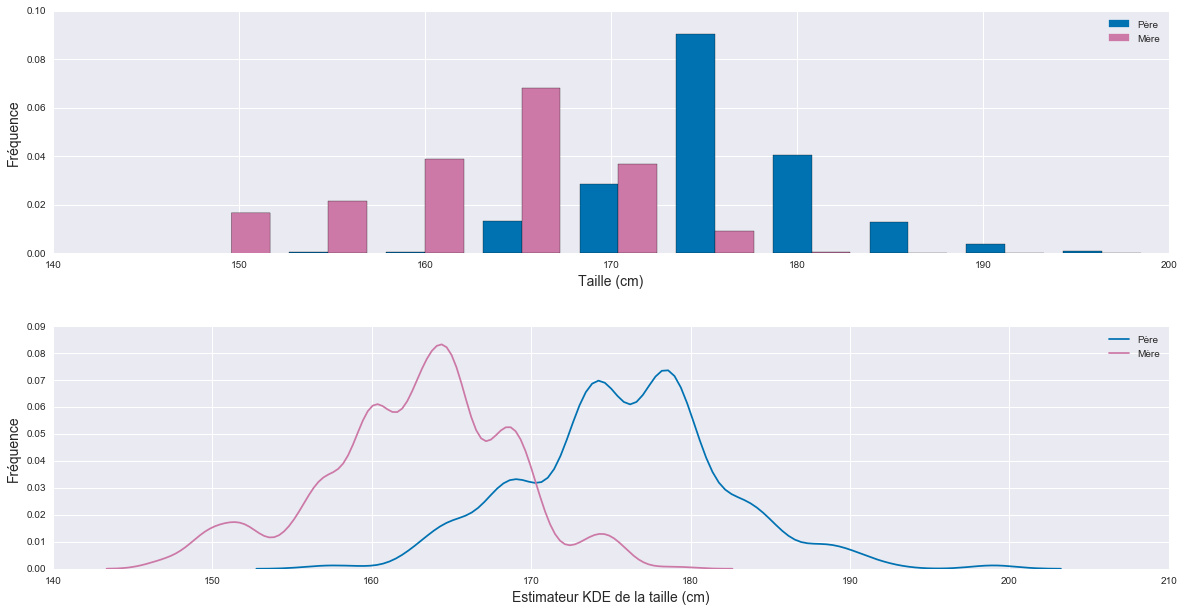

In [84]:
fig1 = plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)

plt.hist([df['Father'], df['Mother']], bins=10, normed=True, align='mid', color=[my_blue, my_pink])
plt.ylabel('Fréquence', fontsize=14)
plt.xlabel('Taille (cm)', fontsize=14)
blue_patch = mpatches.Patch(color=my_blue, label='Père')
violet_patch = mpatches.Patch(color=my_pink, label='Mère')
plt.legend(handles=[blue_patch, violet_patch])

ax2 = fig1.add_subplot(212)
sns.kdeplot(df['Father'], color=my_blue, label='Père')
sns.kdeplot(df['Mother'], color=my_pink, label='Mère')
plt.xlabel('Estimateur KDE de la taille (cm)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.show()

QUESTION 4 : Afficher la taille du père en fonction de la taille de la mère.

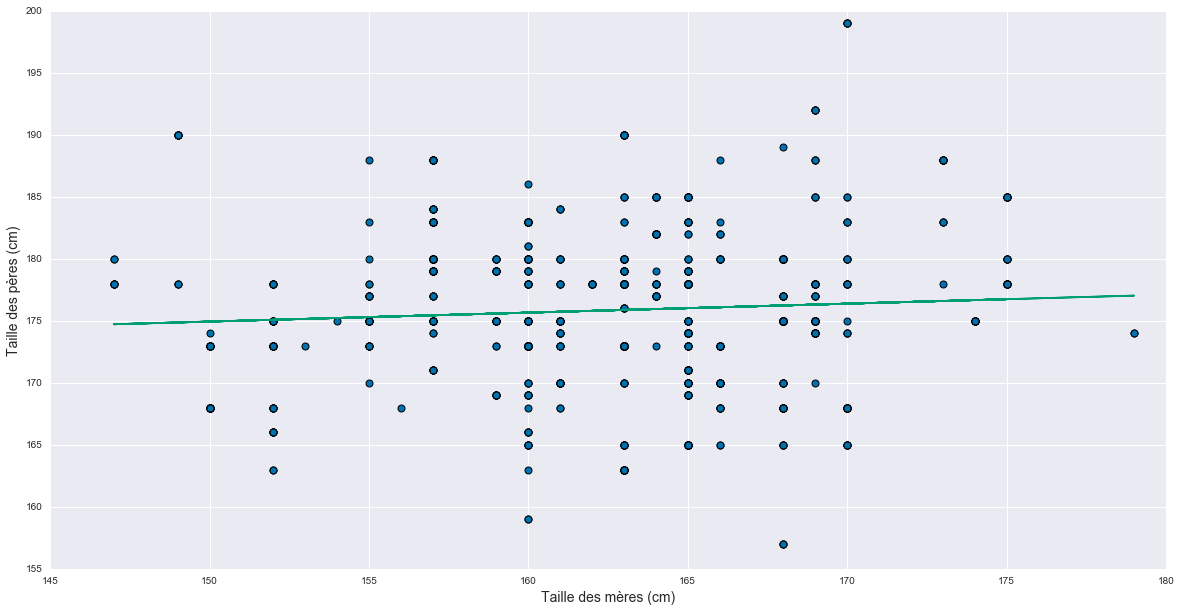

In [85]:
fig2 = plt.figure(figsize=(20, 10))
Y = df['Father']
X = df[['Mother']]
skl_linmod = lm.LinearRegression()
skl_linmod.fit(X, Y)
plt.plot(X, Y, 'o', markeredgecolor='k', markeredgewidth=1)
plt.plot(X, skl_linmod.predict(X), label="OLS")
plt.ylabel('Taille des pères (cm)', fontsize=14)
plt.xlabel('Taille des mères (cm)', fontsize=14)
plt.show()

QUESTION 5 : Afficher l'histogramme du nombre d'enfants par famille.

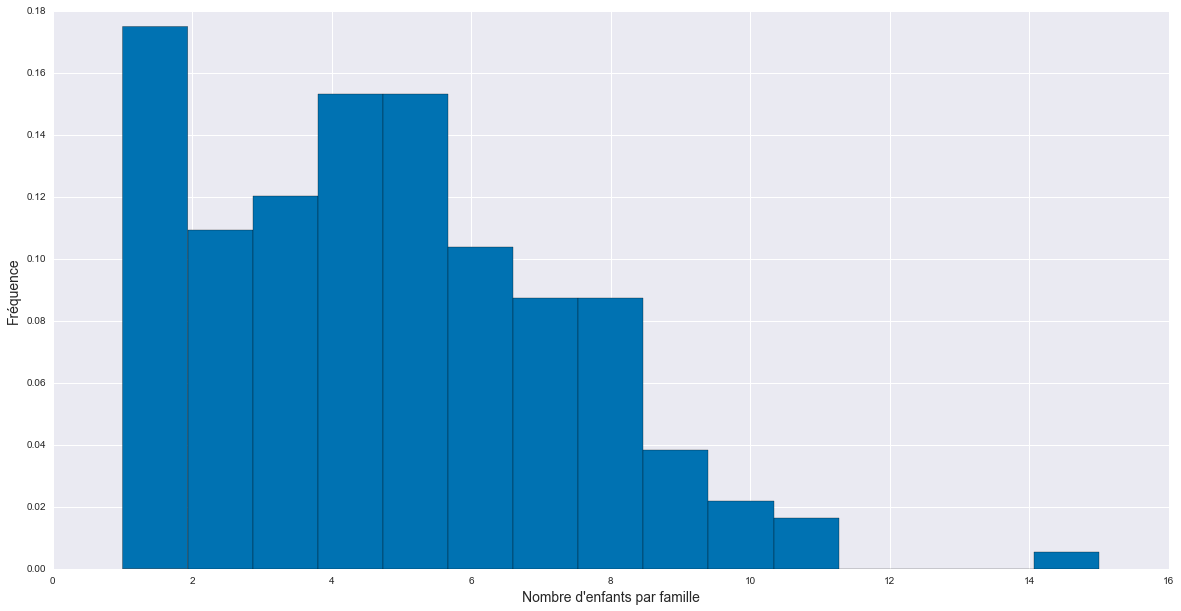

In [86]:
fig3 = plt.figure(figsize=(20, 10))
sub_list = np.array(df[['Family', 'Kids']])
nb_kids_per_family = []
#créer une liste non redondante d'enfants par famille
for i in range(1, len(sub_list)):
    if sub_list[i-1, 0] != sub_list[i, 0]:
        nb_kids_per_family.append(sub_list[i, 1])
plt.hist(nb_kids_per_family, bins=15, normed=True, align='mid', color=my_blue)
plt.ylabel('Fréquence', fontsize=14)
plt.xlabel('Nombre d\'enfants par famille', fontsize=14)
plt.show()

QUESTION 6 : Créer une colonne supplémentaire dans le dataframe avec la moyenne de la taille des parents en $cm$.

In [87]:
df['Mean Parents'] = (df['Father'] + 1.08 * df['Mother'])/2.0

QUESTION 7 : Estimer $\theta_0$ et $\theta_1$ avec $sklearn$.
On va faire un fit linéaire sur la taille des enfants par rapport à la taille moyenne des parents.

In [88]:
X = df[['Mean Parents']]
Y = df['Height']
skl_linmod = lm.LinearRegression()
skl_linmod.fit(X, Y)
theta1 = skl_linmod.coef_
theta0 = skl_linmod.intercept_

Pour $\theta_1$, le résultat obtenu est : 0.63309377

Pour $\theta_0$, le résultat obtenu est: 58.255916588

On va vérifier numériquement ces résultats en utilisant les relations :$$
\begin{array}
\hat{\theta_0} &= \overline{y_n} - \hat{\theta_1}x_n \\
\hat{\theta_1} &= \frac{\sum_{i=0}^n(x_i - \overline{x_n})(y_i - \overline{y_n})}{\sum_{i=0}^n(x_i - \overline{x_n})^2}
\end{array}
$$




In [89]:
X_center = (df['Mean Parents'] - np.mean(df['Mean Parents']))
Y_center = (Y - np.mean(Y))
X_center_std = np.dot(X_center, X_center.transpose())
theta1_num = np.dot(X_center, Y_center.transpose())/ X_center_std
theta0_num = np.mean(Y) - theta1_num * np.mean(df['Mean Parents'])

Obtenu numériquement, le coefficient $\theta_1$: 0.633093766663

Obtenu numériquement, le coefficient $\theta_0$:  58.255916588

Vérifions si les valeurs obtenues numeriquement sont proches de celles obtenues par $sklearn$, pour $\theta_1$:

In [90]:
np.isclose(theta1_num,theta1)

array([ True], dtype=bool)

Vérifions si les valeurs obtenues numeriquement sont proches de de celles obtenues par $sklearn$, pour $\theta_0$:

In [91]:
np.isclose(theta0_num, theta0)

True

QUESTION 8 : Calculer et visualiser les valeurs prédites par genre: $\hat{y_i}$ = $\hat{\theta_0}$+$\hat{\theta_1}$$x_i $

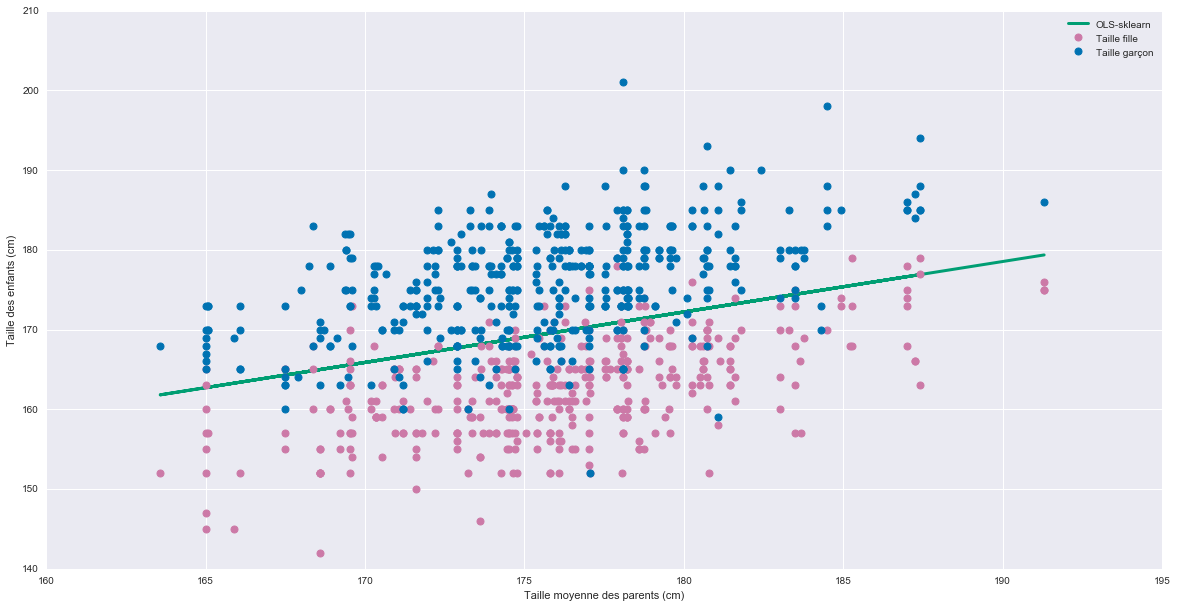

In [92]:
#Récupérer les data par genre du dataframe
Y_girl = []
Y_boy = []
X_girl = []
X_boy = []
sub_list = np.array(df[['Gender', 'Height', 'Mean Parents']])
for i in range(0, len(sub_list)):
    if sub_list[i, 0] == 'M':
        X_boy.append(sub_list[i, 2])
        Y_boy.append(sub_list[i, 1])
    else:
        X_girl.append(sub_list[i, 2])
        Y_girl.append(sub_list[i, 1])
#plot
fig4 = plt.figure(figsize=(20, 10))
plt.plot(X, skl_linmod.predict(X), label="OLS-sklearn", linewidth=3, color=my_green)
plt.plot(X_girl, Y_girl, 'o', label="Taille fille", markeredgecolor=my_pink, color=my_pink, markeredgewidth=1)
plt.plot(X_boy, Y_boy, 'o', label="Taille garçon", markeredgecolor=my_blue, color=my_blue, markeredgewidth=1)
plt.xlabel('Taille moyenne des parents (cm)'), plt.ylabel('Taille des enfants (cm)')
plt.legend(numpoints=1)
plt.show()

QUESTION 9 : Afficher un estimateur de la densité des résidus. 

Tout d'abord, calcul des résidus sur l'ensemble de la population "enfant".

In [93]:
residu = Y - skl_linmod.predict(X)
res_sorted = np.sort(residu)
res_min = residu.min()
res_max = residu.max()

Calcul des résidus par genre.

In [94]:
#reshape des X_girl et X_boy pour le package sklearn
X_G_len = len(X_girl)
X_B_len = len(X_boy)

X_Girl = np.array(X_girl)
X_G = X_Girl.reshape((X_G_len,1))
X_Boy = np.array(X_boy)
X_B = X_Boy.reshape((X_B_len, 1))

#calcul des résidus
residu_girl = Y_girl - skl_linmod.predict(X_G)
residu_boy = Y_boy - skl_linmod.predict(X_B)
sorted_dataG = np.sort(residu_girl)
sorted_dataB = np.sort(residu_boy)

Comme pour la question 3, on va utiliser un estimateur KDE pour la densité des résidus, aussi bien sur la population totale enfants que par genre. En revanche, on va "construire" le KDE de façon à contrôler ses paramètres d'ajustement.

C:\Users\Audrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


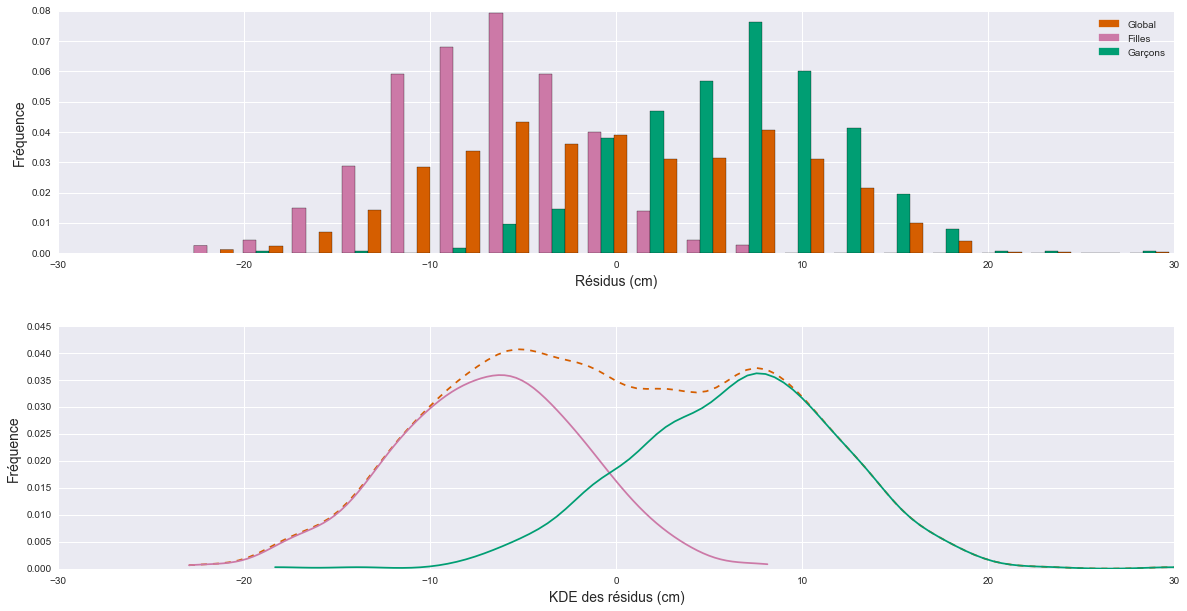

In [95]:
fig5 = plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.3)
ax = fig5.add_subplot(211)
plt.hist([residu_girl, residu_boy, residu], bins=20, normed=True, align='mid', color=[my_pink, my_green, my_orange])
orange_patch = mpatches.Patch(color=my_orange, label='Global')
pink_patch = mpatches.Patch(color=my_pink, label='Filles')
green_patch = mpatches.Patch(color=my_green, label='Garçons')
plt.legend(handles=[orange_patch, pink_patch, green_patch])
plt.ylabel('Fréquence', fontsize=14)
plt.xlabel('Résidus (cm)', fontsize=14)

ax2 = fig5.add_subplot(212)
#KDE pour les résidus de la population globale enfant
kde = KDEUnivariate(res_sorted)
kde.fit(bw=1.5, kernel='gau')
x_grid = np.linspace(res_min, res_max, 100)
kd_est = kde.evaluate(x_grid)
plt.plot(x_grid, kd_est, color=my_orange, linestyle='--')

#KDE pour les filles
kdeG = KDEUnivariate(sorted_dataG)
kdeG.fit(bw=1.5, kernel='gau')
x_gridG = np.linspace(residu_girl.min(), residu_girl.max(), 100)
kd_estG = (X_G_len/df_len)*(kdeG.evaluate(x_gridG))#facteur de normalité (X_G_len/df_len) où df_len est la population totale
plt.plot(x_gridG, kd_estG, color=my_pink)

#KDE pour les garçons
kdeB = KDEUnivariate(sorted_dataB)
kdeB.fit(bw=1.5, kernel='gau')
x_gridB = np.linspace(residu_boy.min(), residu_boy.max(), 100)
kd_estB = (X_B_len/df_len)*(kdeB.evaluate(x_gridB))#facteur de normalité (X_G_len/df_len) 
plt.plot(x_gridB, kd_estB, color=my_green)
ax2.legend_ = None
plt.ylabel('Fréquence', fontsize=14)
plt.xlabel('KDE des résidus (cm)', fontsize=14)
plt.show()

On voit clairement sur ces graphes que la densité des résidus n'est pas centrée, ne serait-ce que pour la population globale. En effet, la population globale ne prend pas en compte le comportement par genre qui est différent et par conséquent l'hypothèse de normalité n'est pas vérifiée. 

QUESTION 10 : Régresser cette fois les $x_i$ sur les $y_i$. Trouver les coefficients $\hat{\alpha_0}$ et $\hat{\alpha_1}$ correspondants.

In [96]:
Xinv = df[['Height']]
Yinv = df['Mean Parents']
skl_linmod = lm.LinearRegression()
skl_linmod.fit(Xinv, Yinv)
alpha1 = skl_linmod.coef_
alpha0 = skl_linmod.intercept_

On obtient par régression linéaire les valeurs suivantes pour: $$\begin{array}
\hat{\alpha_0} &= 148.437160448\\\
\hat{\alpha_1} &= 0.1614903
\end{array}$$
On va vérifier numériquement que: $$\begin{array}
\hat{\alpha_0}&=\overline{x_n} + (\hat{\theta_0}-\overline{y_n}).\frac{\overline{y_n}}{\overline{x_n}}\frac{var_n(x)}{var_n(y)}\\\
\hat{\alpha_1}&= \hat{\theta_1}.\frac{var_n(x)}{var_n(y)}
\end{array}
$$

In [98]:
Xinv_mean = np.mean(df['Height'])
Yinv_mean = np.mean(Yinv)
varXinv = (np.std(df['Height']))**2
varYinv = (np.std(Yinv))**2
alpha0_num = Yinv_mean + ((Xinv_mean / Yinv_mean)*(varYinv / varXinv)*(theta0 - Xinv_mean))
alpha1_num = theta1 * (varYinv / varXinv)

On peut effectuer un test avec $np.isclose$ pour vérifier les égalités précédentes :

In [99]:
np.isclose(alpha1_num, alpha1)
np.isclose(alpha0_num, alpha0)

True

### Partie B : Régression linéaire multiple

On considère un modèle de régression avec les deux variables explicatives 'Father' et 'Mother'.

QUESTION 11 : Calculer $\hat{\theta}$, $\hat{y}$ pour ce modèle, respectivement l’estimateur des moindres carrés et le vecteur de prédiction.

In [100]:
X = df[['Father', 'Mother']]
X = sm.add_constant(X)
y = df['Height']
theta = sm.OLS(y, X).fit().params

L'estimateur OLS obtenu est $\hat{\theta}$: $$
\begin{array}{c}
[57.6946261269, -- intercept\\\
0.382307905018, -- père\\\
0.274265674791] -- mère
\end{array}
$$
Le vecteur prédiction est donné par $zz$ dans le code suivant:

In [101]:
XX_min = df['Father'].min()
XX_max = df['Father'].max()
YY_min = df['Mother'].min()
YY_max = df['Mother'].max()
ZZ_min = df['Height'].min()
ZZ_max = df['Height'].max()
XX = np.arange(XX_min, XX_max, 10.0)
YY = np.arange(YY_min, YY_max, 10.0)
xx, yy = np.meshgrid(XX, YY)
zz = theta[0] + theta[1] * xx + theta[2] * yy #vecteur de prédiction

QUESTION 12 :  Aﬃcher les points et leur prédiction sur un même graphique 3D.

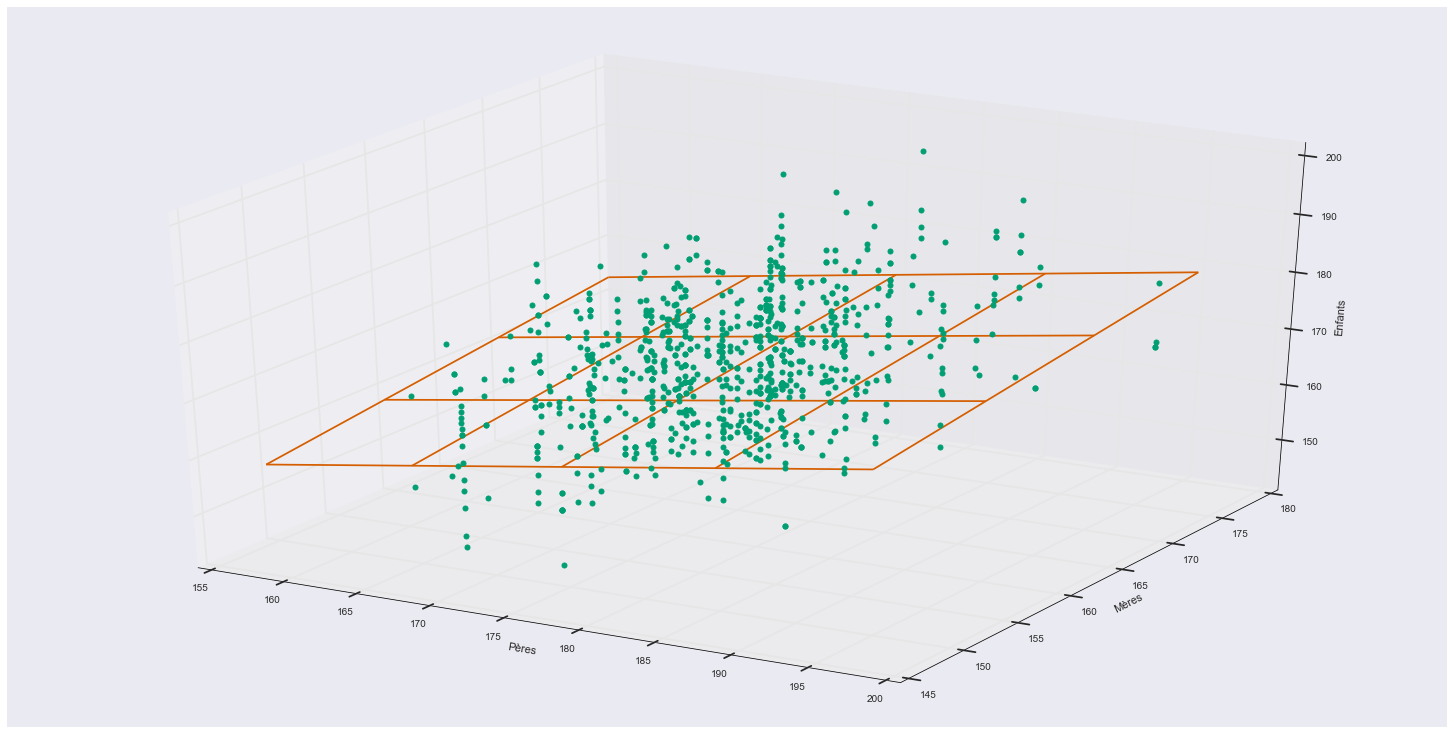

In [102]:
fig6 = plt.figure(figsize=(20, 10))
ax = Axes3D(fig6)
ax.set_xlabel('Pères')
ax.set_ylabel('Mères')
ax.set_zlabel('Enfants')
ax.set_zlim(ZZ_min, ZZ_max)
ax.plot(X['Father'], X['Mother'], y, 'o', markeredgecolor=my_green, color=my_green, markeredgewidth=1, markersize=5)
ax.plot_wireframe(xx, yy, zz, rstride=1, cstride=1, color=my_orange)
plt.show()

QUESTION 13: Calculer le carré de la norme du vecteur des résidus $||r||^2$, avec $r_i$=$y_i$-$\hat{y_i}$. 

In [103]:
residus = y - np.dot(X, theta)
res_norm2 = np.dot(residus, residus.transpose())

Le carré de la norme des résidus est : 66544.7955878

QUESTION 14 : 

On va calculer les résidus pour la population globale et utiliser un estimateur de la densité des résidus avec une méthode à noyau.

In [104]:
#Estimateur de la densité des résidus
res2_min = residus.min()
res2_max = residus.max()
res2_sorted = np.sort(residus)
kde = KDEUnivariate(res2_sorted)
kde.fit(bw=1.5, kernel='gau')
x_grid = np.linspace(res2_min, res2_max, 100)
kd_est = kde.evaluate(x_grid)

C:\Users\Audrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Un estimateur pour les filles : 

In [105]:
#Estimateur de la densité des résidus par genre. Création d'une array tenant compte du genre
sub_list = np.array(df[['Gender', 'Father', 'Mother']])
XG_mother = []
XG_father = []
XB_mother = []
XB_father = []
for i in range(0, len(sub_list)):
    if sub_list[i,0] == 'M':
        XB_mother.append(sub_list[i, 2])
        XB_father.append(sub_list[i, 1])
    else:
        XG_mother.append(sub_list[i, 2])
        XG_father.append(sub_list[i, 1])

# pour les filles
XG_matrix = np.column_stack((np.ones(X_G_len), XG_father, XG_mother))
residus_girl = Y_girl - np.dot(XG_matrix, theta)
res2_Gmin = residus_girl.min()
res2_Gmax = residus_girl.max()
res2_Gsorted = np.sort(residus_girl)
kde2G = KDEUnivariate(res2_Gsorted)
kde2G.fit(bw=1.5, kernel='gau')
x2G_grid = np.linspace(res2_Gmin, res2_Gmax, 100)
kd2G_est = (X_G_len/df_len)*kde2G.evaluate(x2G_grid)#pondération de la population

C:\Users\Audrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Un estimateur pour les garçons:

In [106]:
XB_matrix = np.column_stack((np.ones(X_B_len), XB_father, XB_mother))
residus_boy = Y_boy - np.dot(XB_matrix, theta)
res2_Bmin = residus_boy.min()
res2_Bmax = residus_boy.max()
res2_Bsorted = np.sort(residus_boy)
kde2B = KDEUnivariate(res2_Bsorted)
kde2B.fit(bw=1.5, kernel='gau')
x2B_grid = np.linspace(res2_Bmin, res2_Bmax, 100)
kd2B_est = (X_B_len/df_len)*kde2B.evaluate(x2B_grid) #pondération de la population

C:\Users\Audrey\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


Visualisation sur un graphe:

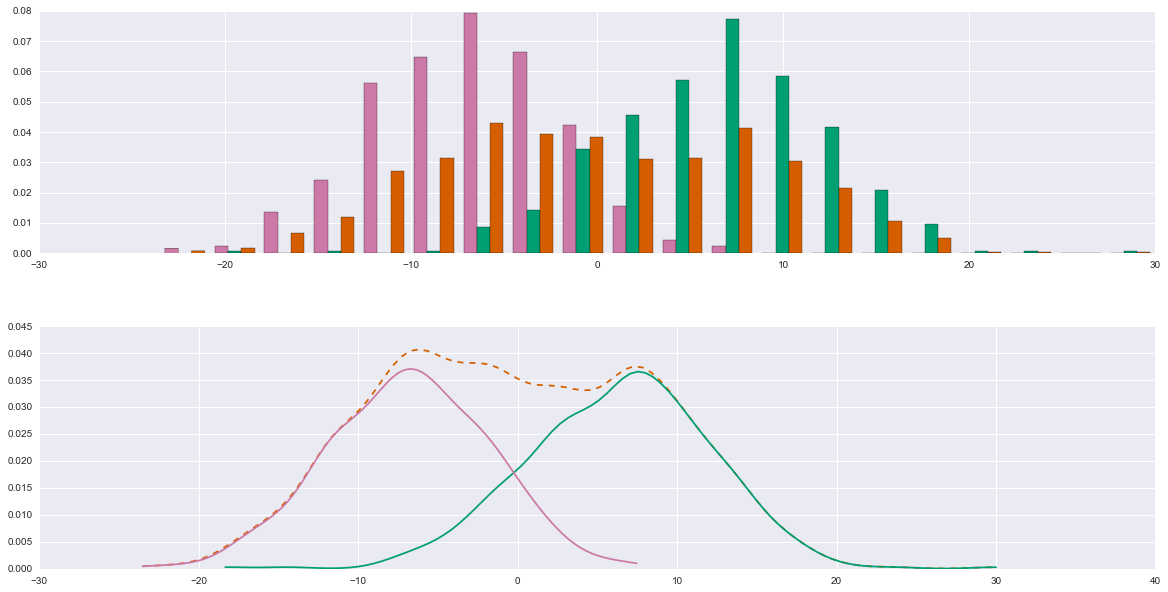

In [107]:
fig7 = plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.3)
ax = fig7.add_subplot(211)
plt.hist([residus_girl, residus_boy, residus], bins=20, normed=True, align='mid', color=[my_pink, my_green, my_orange])

ax2 = fig7.add_subplot(212)
plt.plot(x_grid, kd_est, color=my_orange, linestyle='--')
plt.plot(x2B_grid, kd2B_est, color=my_green)
plt.plot(x2G_grid, kd2G_est, color=my_pink)
plt.show()

On obtient (fort heureusement) des résultats similaires au cas univarié, bien que dans ce dernier cas, nous avions considéré la taille moyenne des parents et non la taille des parents par genre. On voit également que la densité des résidus de la population globale n'est pas centrée car elle ne tient pas compte des sous-population 'fille' et 'garçons'.

QUESTION 15 : Influence des variables avant et après recentrage.

In [108]:
df2 = df
#recentrage et normalisation des variables
df2['Father'] = (df2['Father'] - np.mean(df2['Father']))/np.std(df2['Father'])
df2['Mother'] = (df2['Mother'] - np.mean(df2['Mother']))/np.std(df2['Mother'])
df2['Height'] = (df2['Height'] - np.mean(df2['Height']))/np.std(df2['Height'])

#Calcul de l'estimateur par OLS
X2= df2[['Father','Mother']]
X2 = sm.add_constant(X2)
y2 = df2['Height']
theta2 = sm.OLS(y2, X2).fit().params

#Calcul du vecteur de prédiction
XX2_min = df2['Father'].min()
XX2_max = df2['Father'].max()
YY2_min = df2['Mother'].min()
YY2_max = df2['Mother'].max()
ZZ2_min = df2['Height'].min()
ZZ2_max = df2['Height'].max()
XX2 = np.arange(XX2_min, XX2_max, 0.5)
YY2 = np.arange(YY2_min, YY2_max, 0.5)
xx2, yy2 = np.meshgrid(XX2, YY2)
zz2 = theta2[0] + theta2[1] * xx2 + theta2[2] * yy2 #vecteur de prédiction

Après recentrage et normalisation des variables, on obtient comme valeur pour l'estimateur $\hat{\theta}$ = $$
\begin{array}
&[9.47159017883e^{-16}, -- intercept = 0\\\
0.260654041501, -- père\\\
0.177762661867] -- mère
\end{array}
$$
Si on compare avec le $\hat{\theta}$ obtenu avant renormalistion et recentrage, on voit que les valeurs obtenues sont légèrement différentes mais que l'influence respective des variables est inchangée. Il semblerait en effet, d'après cette étude que la taille des pères aient une influence plus grande sur la taille de leur progéniture que la taille des mères.
On peut également visualiser ces résultats sur un graphe:

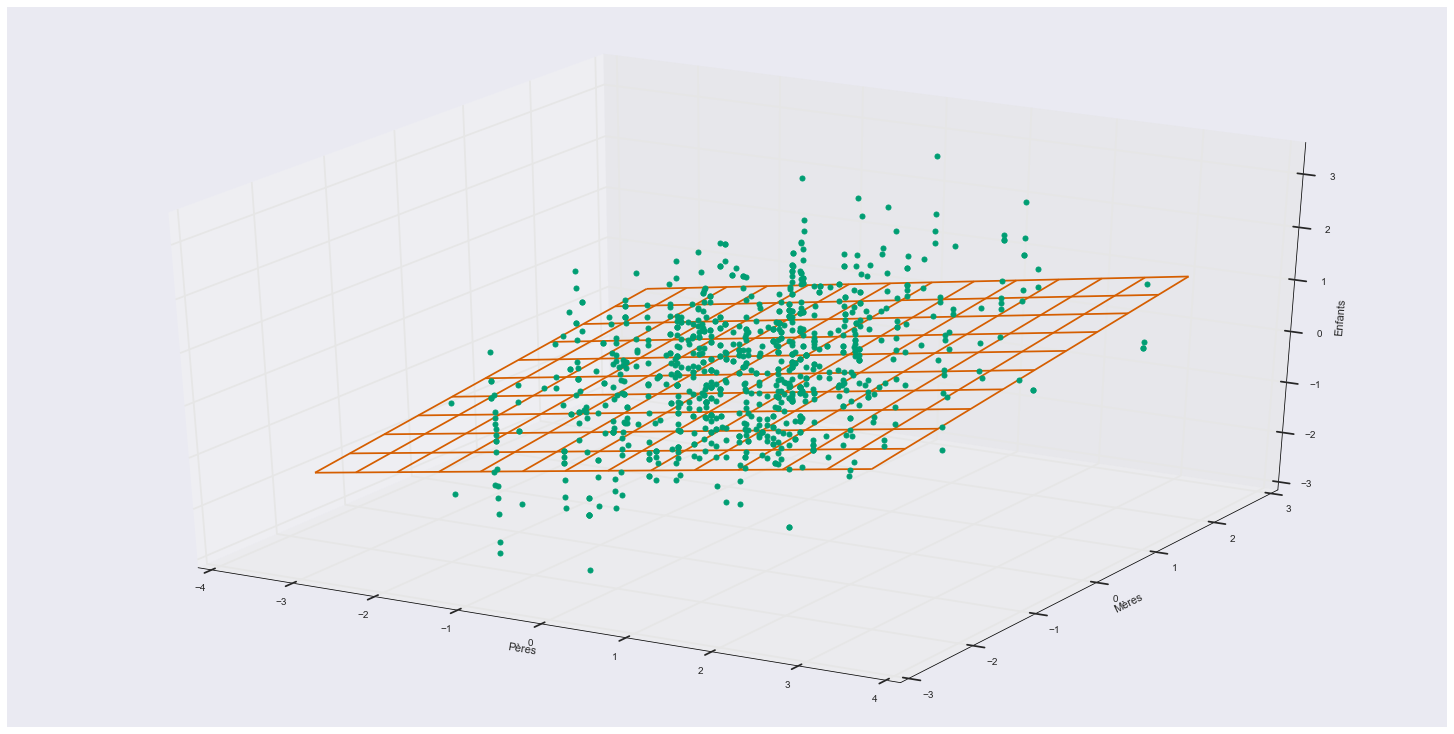

In [109]:
fig8 = plt.figure(figsize=(20, 10))
ax = Axes3D(fig8)
ax.set_xlabel('Pères')
ax.set_ylabel('Mères')
ax.set_zlabel('Enfants')
ax.set_zlim(ZZ2_min, ZZ2_max)
ax.plot(X2['Father'], X2['Mother'], y2, 'o', markeredgecolor=my_green, color=my_green, markeredgewidth=1, markersize=5)
ax.plot_wireframe(xx2, yy2, zz2, rstride=1, cstride=1, color=my_orange )
plt.show()

##  Exercice 2 : (Analyse du jeu de données auto-mpg) 

Import de nouvelles librairies utiles à l'exercice :

In [110]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from numpy import linalg as LA
from collections import defaultdict
from operator import itemgetter
from tabulate import tabulate
from IPython.display import HTML

QUESTION 1:  Importer la base de données accesible par une URL: 

In [111]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
df = pd.read_table(url, sep='\s+', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                                                       'acceleration', 'year', 'origin', 'car_name'])

Les données manquantes dans la base de données sont repérées par le marqueur $NaN$. Les lignes contenant ce marqueur peuvent être enlevées de la base de données par la fonction $dropna()$:

In [112]:
df = df.dropna()

QUESTION 2 :  Calculer un estimateur des moindres carrés $\hat{\theta}$ et sa prédiction $\hat{y}$ sur les 9 premières lignes de la BD.

In [113]:
df1 = df.drop('car_name', 1)
df2 = df1.drop('origin', 1)
df3 = df2.iloc[0:9]
X = df3[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]
y = df3['mpg']
skl_linmod = lm.LinearRegression()
skl_linmod.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Les valeurs obtenues pour $\hat{\theta}$ sont:$$
\begin{array}
&intercept &=  30.7716953656\\\
cylinders &=  0.0\\\
displacement &=  0.0540884756683\\\
horsepower &=  -0.094530596162\\\
weight  &=  -0.00424073670631\\\
acceleration  &=  -0.199367012686\\\
year  &=  0.0
\end{array}
$$
Les variables $cylinders$ et $year$ sont estimées nulles, ce qui peut se comprendre car sur ces lignes, elles sont constantes.

La prédiction $\hat{y}$ est donnée par :

In [114]:
y_predict = skl_linmod.intercept_+ np.dot(skl_linmod.coef_ , X.transpose())

On obtient comme valeurs: $$
\begin{array}
&[ 17.83593432 \\\
16.15135218  \\\
17.02803274  \\\
16.08414928  \\\
17.15247702 \\\
14.85588522  \\\
14.27266143  \\\
14.2658702   \\\
13.35363761]
\end{array}$$

QUESTION 3: Même question qu'en  2 mais sur l'ensemble de la BD. On va dans un premier temps centrer et réduire les données.

In [115]:
X = df2[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                        'year']]
y = df2['mpg']
#centrer et réduire les variables
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y_scaled = (y - np.mean(y)) / np.std(y)

OLS sur la BD entière:

In [116]:
skl_linmod = lm.LinearRegression()
skl_linmod.fit(X_scaled, y_scaled)
#calcul de la prédiction
y_predict= skl_linmod.predict(X_scaled)

On obtient comme valeurs: $$
\begin{array}
&intercept &=  1.3147594772e^{-16}  -- intercept = 0\\\
cylinders &=  -0.0720906557912\\\
displacement &=  0.102946946027\\\
horsepower &=  -0.00193000839604\\\
weight  &=  -0.739443986449\\\
acceleration  &=  0.030141841854\\\
year  &=  0.355567398949\\\
\end{array}$$
D'après ces valeurs; il semblerait que les variables qui sont le plus explicatives pour la consommation d'un vehicule soient le poids $weight$ et la cylindrée $cylinders$.

QUESTION 4 : Calculer $||r||^2$ (le carré de la norme du vecteur des résidus).

In [117]:
residu = y_scaled - y_predict
residu_norm2 = LA.norm(residu, ord=2)**2 #le carré de la norme du vecteur des résidus
n = len(y_scaled) #nb d'observations
p = 7 #nb de variables explicatives

$||r||^2$ = 74.7719266969

On calcule maintenant $\frac{||r||^2}{n-p}$

In [118]:
residu_norm2/(n-p)

0.19421279661545429

On va vérifier numériquement que $||y-\overline{y_n}\mathtt{1}_n||^2$=$||r||^2$+$||\hat{y}-\overline{y_n}\mathtt{1}_n||^2$

In [119]:
diff_y = y_scaled - np.mean(y)*np.ones(n) 
diff_y_pred = y_predict - np.mean(y)*np.ones(n)
dyff_y_norm2 = LA.norm(diff_y, ord=2)**2 #terme à gauche de l'égalité
test_diff = residu_norm2 + LA.norm(diff_y_pred, ord=2)**2 #terme à droite de l'égalité
np.isclose(dyff_y_norm2, test_diff)

True

QUESTION 5 : On entre une nouvelle observation, on veut prédire la consommation du nouveau véhicule:

In [120]:
#Prédiction de la consommation d'un nouveau véhicule
skl_linmod.fit(X, y)
#Vecteur de prédiction sur des data non rescalées
theta = []
theta.append(skl_linmod.intercept_)
for i in range(0, 6):
    theta.append(skl_linmod.coef_[i])
nle_observation = np.array([1, 6, 225, 100, 3233, 15.4, 76])
print('La consommation prédite en miles par gallon est : ', np.dot(theta, nle_observation.transpose()))

La consommation prédite en miles par gallon est :  21.7762201826


La consommation prédite est de $\~22$ mpg

QUESTION 6 : Utiliser la transformation $PolynomialFeatures$ de $sklearn$ sur les données brutes:

In [121]:
#Ajuster un modèle d'ordre 2 sur les data brutes
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly.fit_transform(X)
scaler = preprocessing.StandardScaler().fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)
#normalisation et centralisation
scaler = preprocessing.StandardScaler().fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)
#mettre sous forme de dataframe
field = ['constant', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year',
        'cylinders_2', 'cylinders_displacement', 'cylinders_horsepower', 'cylinders_weight', 'cylinders_acceleration', 'cylinders_year',
        'displacement_2', 'displacement_horsepower', 'displacement_weight', 'displacement_acceleration', 'displacement_year',
        'horsepower_2', 'horsepower_weight', 'horsepower_acceleration', 'horsepower_year',
        'weight_2', 'weight_acceleration', 'weight_year',
        'acceleration_2', 'acceleration_year', 'year_2']
field2 = field[1:28]
d_poly_scaled = defaultdict(list)
index = np.arange(0, len(X_poly_scaled))
for i in range(1, len(field)):
    d_poly_scaled[field[i]].append(X_poly_scaled[:, i])
df_poly_scaled = pd.DataFrame(d_poly_scaled, index=index, columns=field2)

On effectue une OLS sur la nouvelle matrice transformée par polynome df_poly_scaled

In [149]:
X_poly_df = X_poly_scaled[:, 1:28]
skl_linmod.fit(X_poly_df, y_scaled)
y_poly_predict = skl_linmod.predict(X_poly_df)
for i in range(0,27):
    print(field2[i],':',skl_linmod.coef_[i])

cylinders : 1.71180205561
displacement : -6.21342258773
horsepower : 0.661211906639
weight : 2.24128468234
acceleration : -2.05909314366
year : -3.44847856348
cylinders_2 : -1.04359447967
cylinders_displacement : -0.378107817847
cylinders_horsepower : 1.53324849483
cylinders_weight : 0.684713690083
cylinders_acceleration : 0.625613561203
cylinders_year : -2.08199948766
displacement_2 : 0.166732976352
displacement_horsepower : 0.433615374157
displacement_weight : 0.66769862031
displacement_acceleration : -0.422481731156
displacement_year : 5.60411261899
horsepower_2 : -0.460769026653
horsepower_weight : -0.78911220309
horsepower_acceleration : -0.306188817772
horsepower_year : -0.622263219474
weight_2 : 0.40515861762
weight_acceleration : 0.108939594742
weight_year : -3.22205455298
acceleration_2 : 0.255808077187
acceleration_year : 1.7849302547
year_2 : 3.82916435114


QUESTION 7 : pd.get_dummies pour gérer la variable 'origin'

On tranforme la variable qualitative 'origin' en varaible quantitative pour vérifier dans quel pays/continent, les voitures consomment le plus. Pour ce faire, on effectue une régression linéaire sur la nouvelle table obtenue.

In [151]:
dummy_origin = pd.get_dummies(df1['origin'], prefix='country')
cols_to_keep = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
data_dummy = df1[cols_to_keep].join(dummy_origin.ix[:, :])
X = data_dummy[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration','year', 'country_1.0', 'country_2.0', 'country_3.0']]
y = data_dummy['mpg']
skl_linmod_no = lm.LinearRegression(fit_intercept=False)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)#recentrage des données
y_scaled = (y - np.mean(y))/np.std(y)
skl_linmod_no.fit(X_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Les résultats obtenus sont:$$
\begin{array}
&cylinders &=  -0.107025923178\\\
displacement &=  0.321488649908\\\
horsepower &=  -0.0896735363363\\\
weight &=  -0.730277000563\\\
acceleration  &=  0.027960835162\\\
year &=  0.366734117275\\\
origin USA  &=  -0.0964123332573\\\
origin Europe  &=  0.0523470610813\\\
origin Japan  &=  0.0669438206225\\\
\end{array}
$$
On remarque d'après ces résultats que les voitures au Japon sont celles qui consomment le moins alors qu'aux USA, ce sont celles qui consomment le plus.

QUESTION 8 : Utiliser la même méthode pour déterminer les marques avec des voitures qui consomment le moins.

Au préalable, on va nettoyer les données car certaines marques sont redondantes ou mal orthographiées.

In [153]:
#nettoyer les data pour avoir des marques de voiture qui existent et enlever les doublons
df['brand'] = df['car_name'].str.split(' ').str.get(0)
df['brand'] = df['brand'].str.replace('toyouta', 'toyota').str.replace('chevroelt', 'chevrolet'). \
    str.replace('vw','volkswagen'). str.replace('mercedes-benz', 'mercedes').str.replace('vokswagen', 'volkswagen').str.replace ('maxda','mazda')

On va transformer les data qualitatives en data quantitatives avec get_dummies.

In [154]:
df4 = df.drop('car_name', 1)
df4 = df.drop('origin', 1)
dummy_brand = pd.get_dummies(df4['brand'], prefix='brand')
cols_to_keep = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
data_dummy = df4[cols_to_keep].join(dummy_brand.ix[:, :])
X = data_dummy.loc[ : , 'cylinders':'brand_volvo'] # 'horsepower', 'weight', 'acceleration','year', 'brand_amc', 'country_2.0', 'country_3.0']]
y = data_dummy['mpg']

Puis on effectue une OLS:

In [155]:
skl_linmod_no = lm.LinearRegression(fit_intercept=False)
skl_linmod_no.fit(X, y)
field2 = list(X.columns.values)

Il est possible de créer un dictionnaire pour stocker les coefficients de la régression par marque de voiture et de les classer par valeur:

In [156]:
brand = defaultdict(list)
for i in range(0, 7):
    print(str(field2[i]) + ' = ', skl_linmod_no.coef_[i])
for i in range(7, len(skl_linmod_no.coef_)):
    print(str(field2[i]) + ' = ', skl_linmod_no.coef_[i])
    brand[field2[i]].append(abs(skl_linmod_no.coef_[i]))
print('======================')
brand_sorted = sorted(brand.items(), key=itemgetter(1))
print(brand_sorted)

cylinders =  -0.6266697272
displacement =  0.0256119735537
horsepower =  -0.0253038742405
weight =  -0.00638424915491
acceleration =  0.0419719288286
year =  0.747620311735
brand_amc =  -16.4442012475
brand_audi =  -12.2262991658
brand_bmw =  -14.0712955182
brand_buick =  -15.1401372137
brand_cadillac =  -12.4708607129
brand_capri =  -14.7752775636
brand_chevrolet =  -15.1165673242
brand_chevy =  -14.5836362933
brand_chrysler =  -16.3135179032
brand_datsun =  -10.583466883
brand_dodge =  -14.2859669062
brand_fiat =  -11.5690772448
brand_ford =  -15.701644955
brand_hi =  -11.7886699181
brand_honda =  -11.2632158269
brand_mazda =  -13.2072297355
brand_mercedes =  -11.7420564646
brand_mercury =  -15.9824783743
brand_nissan =  -10.4634973402
brand_oldsmobile =  -13.9444190045
brand_opel =  -14.0852106614
brand_peugeot =  -12.7049034317
brand_plymouth =  -13.638807535
brand_pontiac =  -13.5442739716
brand_renault =  -11.9811582945
brand_saab =  -13.0322996744
brand_subaru =  -12.9842490962


On en déduit que les voitures de marque 'Triumph', 'Nissan' et 'Datsun' consomment le moins.

QUESTION 9 : Calculer la SVD de $X$ = $UsV^T$

In [157]:
X = df2[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]
U, s, V = LA.svd(X, full_matrices=False)

Vériﬁer numériquement que $H$ = $UU^T$ est une projection orthogonale.

In [160]:
H = np.dot(U, U.transpose())
if np.isclose(H, np.dot(H, H)).all() and np.isclose(H, H.transpose()).all():
    print('H est un projecteur orthogonal car symétrique et idempotente')

H est un projecteur orthogonal car symétrique et idempotente


 Trier la base de données en fonction de cette nouvelle variable 'levier' qui est la diagonale de la matrice $H$.

In [162]:
levier = np.diag(H)
df2['levier'] = levier
df5 = df.join(df2['levier'])
print(df5.sort_values('levier', ascending=False))

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
19   14.0        8.0         455.0       225.0  3086.0          10.0  70.0   
34    9.0        8.0         304.0       193.0  4732.0          18.5  70.0   
8    14.0        8.0         455.0       225.0  4425.0          10.0  70.0   
32   10.0        8.0         307.0       200.0  4376.0          15.0  70.0   
33   11.0        8.0         318.0       210.0  4382.0          13.5  70.0   
6    14.0        8.0         454.0       220.0  4354.0           9.0  70.0   
123  16.0        8.0         400.0       230.0  4278.0           9.5  73.0   
31   10.0        8.0         360.0       215.0  4615.0          14.0  70.0   
102  12.0        8.0         455.0       225.0  4951.0          11.0  73.0   
7    14.0        8.0         440.0       215.0  4312.0           8.5  70.0   
307  23.9        8.0         260.0        90.0  3420.0          22.2  79.0   
306  27.2        4.0         141.0        71.0  3190.0          

Les voitures $buick$ $estate$ $wagon$ $(sw)$, $hi$ $1200d$ et $pontiac$ $catalina$ sont celles qui ont les plus grands leviers, c'est-à-dire qu'elles sont supposées avoir les plus grandes valeurs aberrantes. En enlevant ces valeurs on devrait avoir une distribution plus reserrée au niveau du vecteur de prédiction.